Task 1.1--  Blob detection and Image Quality Enhancement

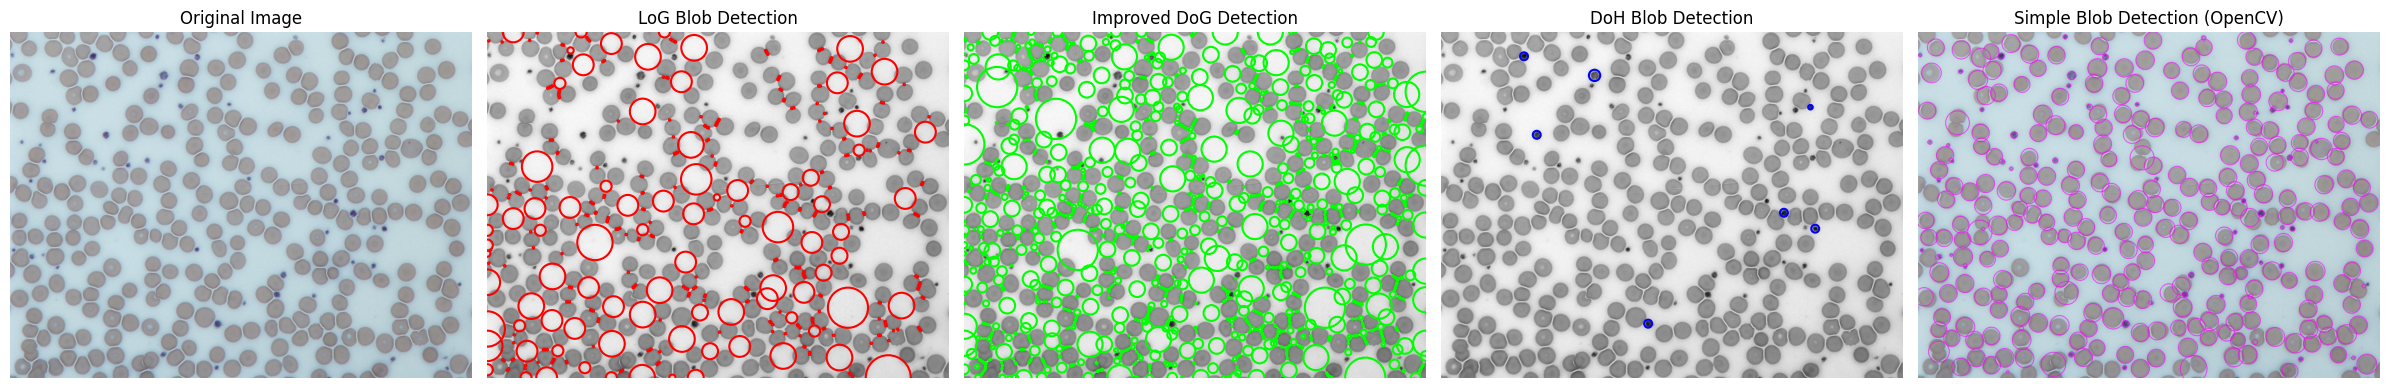

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, blob_doh
from skimage.color import rgb2gray
from skimage import exposure


image = cv2.imread('/content/Blood Cell.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blobs_log = blob_log(gray, min_sigma=1, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] *= np.sqrt(2)


blobs_dog = blob_dog(gray, min_sigma=1, max_sigma=30, sigma_ratio=1.6, threshold=0.05)
blobs_dog[:, 2] *= np.sqrt(2)


blobs_doh = blob_doh(gray, min_sigma=1, max_sigma=30, num_sigma=10, threshold=0.01)


params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 10
params.filterByCircularity = True
params.minCircularity = 0.5
params.filterByConvexity = True
params.minConvexity = 0.5
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)
simple_blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (255, 0, 255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


fig, axs = plt.subplots(1, 5, figsize=(24, 5))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(gray, cmap='gray')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False)
    axs[1].add_patch(c)
axs[1].set_title('LoG Blob Detection')
axs[1].axis('off')

axs[2].imshow(gray, cmap='gray')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='lime', linewidth=1.5, fill=False)
    axs[2].add_patch(c)
axs[2].set_title('Improved DoG Detection')
axs[2].axis('off')

axs[3].imshow(gray, cmap='gray')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='blue', linewidth=1.5, fill=False)
    axs[3].add_patch(c)
axs[3].set_title('DoH Blob Detection')
axs[3].axis('off')

axs[4].imshow(cv2.cvtColor(simple_blob_image, cv2.COLOR_BGR2RGB))
axs[4].set_title('Simple Blob Detection (OpenCV)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


Task 1.2--Image Quality Enhancement

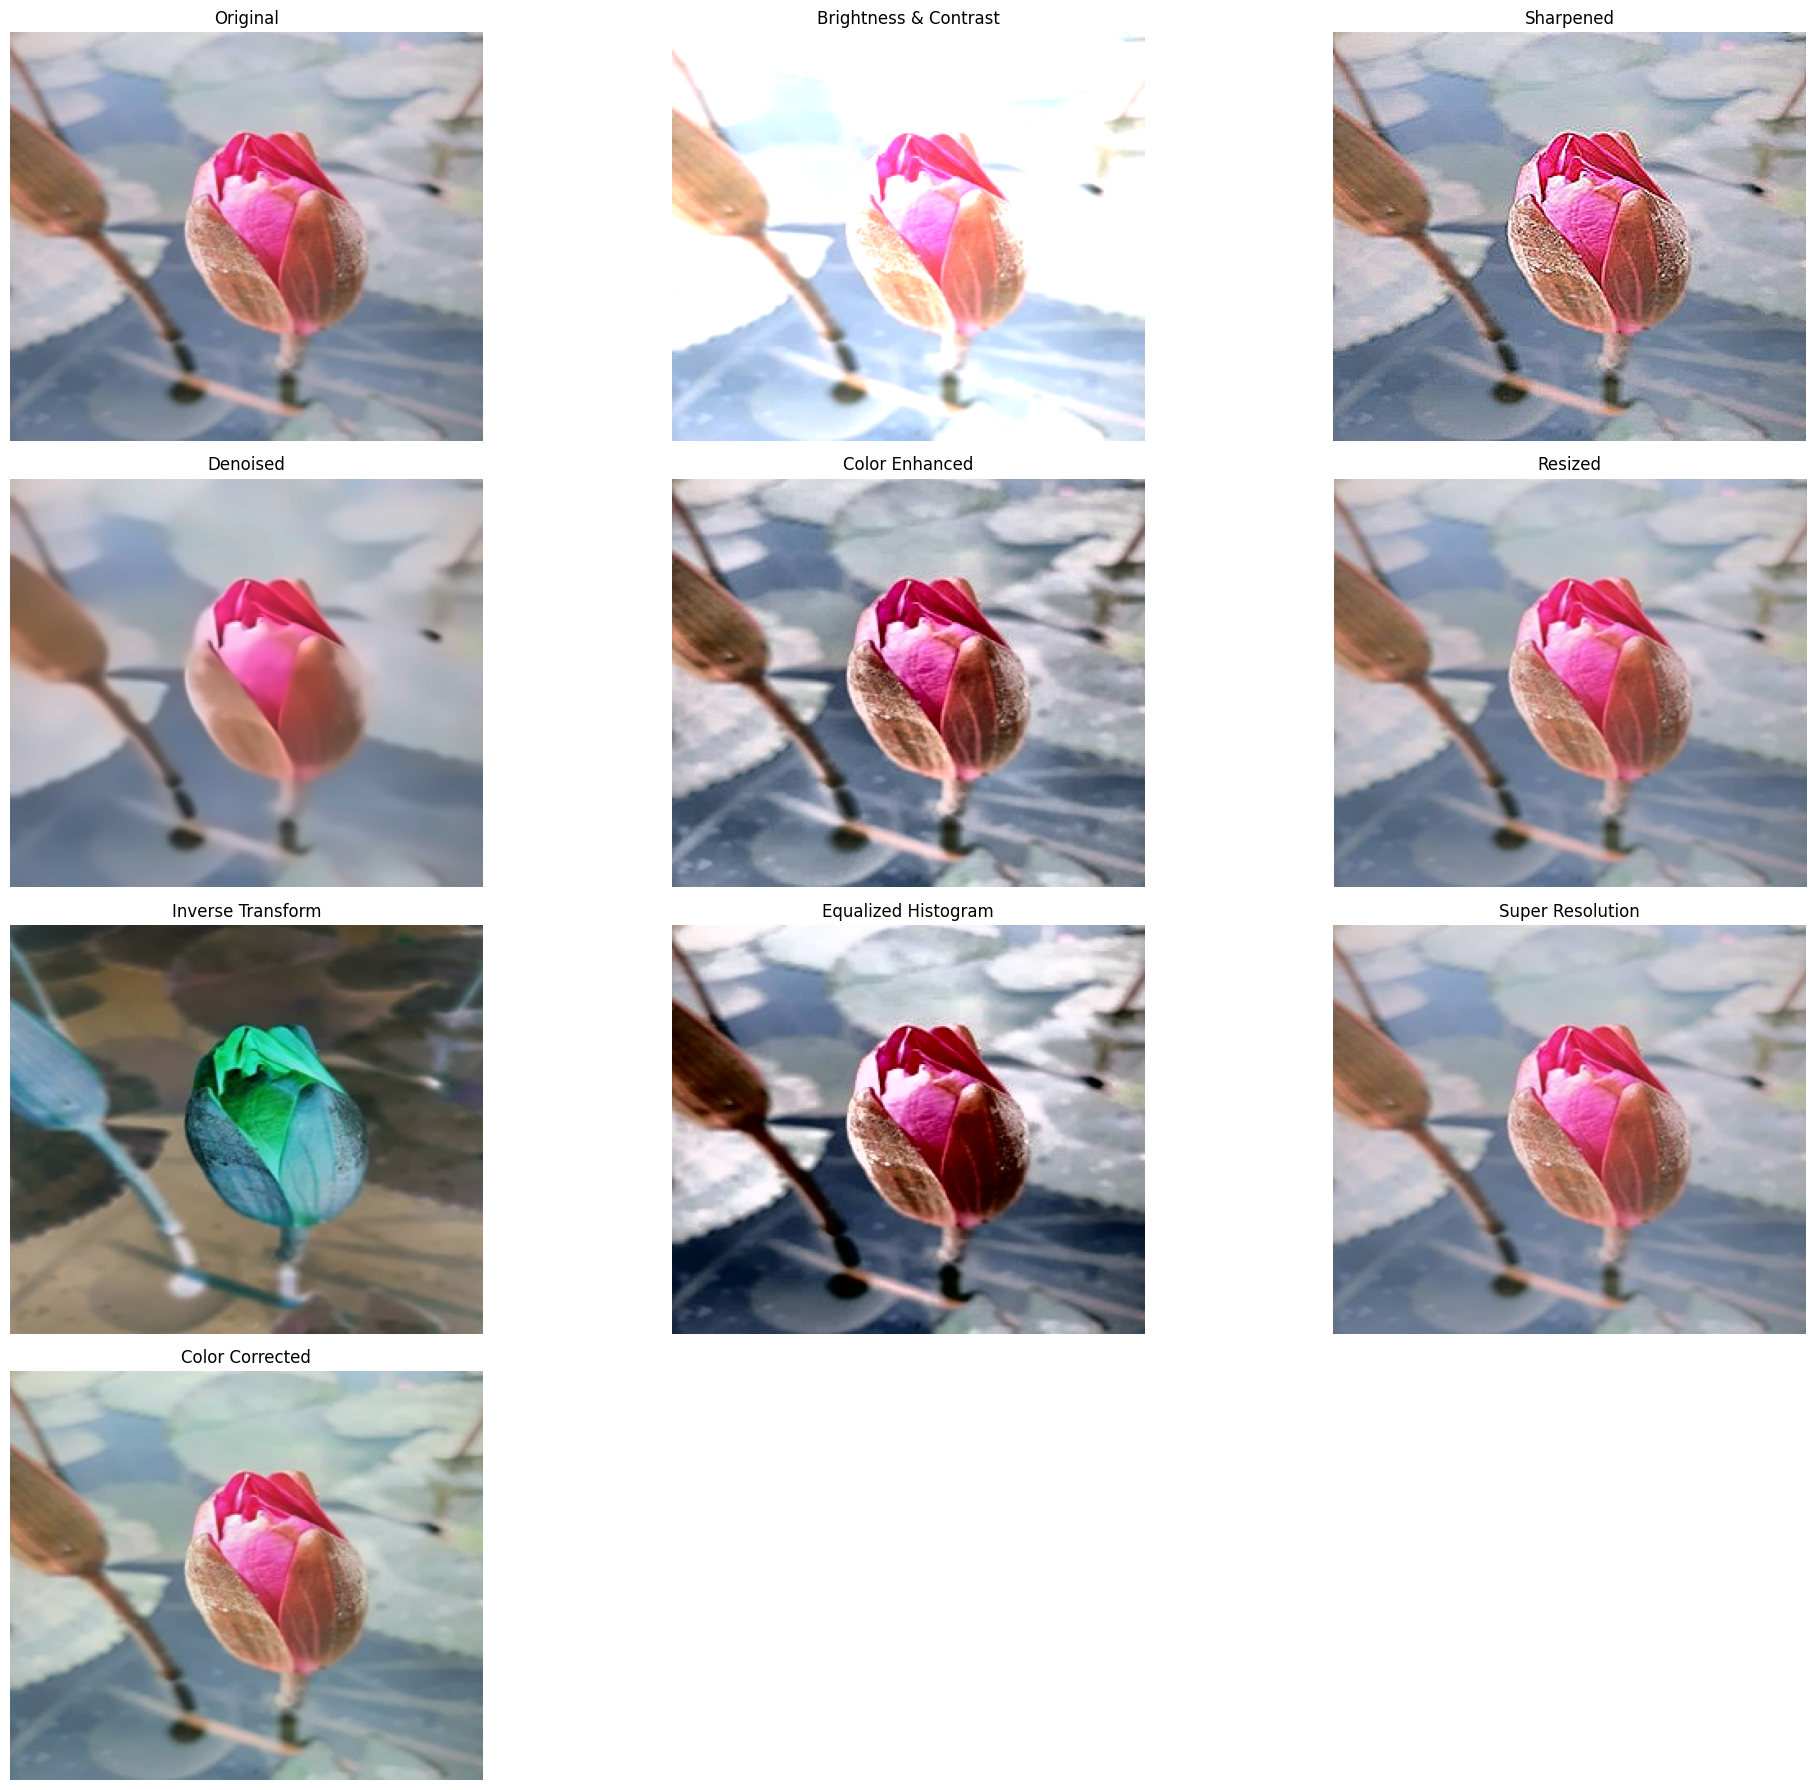

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/Picture1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def adjust_brightness_contrast(image, alpha=1.5, beta=30):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)


def denoise_image(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)


def enhance_color(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

def resize_image(image, scale_percent=150):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)


def inverse_transform(image):
    return 255 - image


def equalize_histogram(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


def super_resolution(image):
    return cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LANCZOS4)

def color_correction(image):
    result = image.copy()
    avg_b = np.average(result[:, :, 0])
    avg_g = np.average(result[:, :, 1])
    avg_r = np.average(result[:, :, 2])

    avg_gray = (avg_b + avg_g + avg_r) / 3
    result[:, :, 0] = np.clip((result[:, :, 0] * (avg_gray / avg_b)), 0, 255)
    result[:, :, 1] = np.clip((result[:, :, 1] * (avg_gray / avg_g)), 0, 255)
    result[:, :, 2] = np.clip((result[:, :, 2] * (avg_gray / avg_r)), 0, 255)
    return result.astype(np.uint8)


bright_contrast = adjust_brightness_contrast(img)
sharpened = sharpen_image(img)
denoised = denoise_image(img)
color_enhanced = enhance_color(img)
resized = resize_image(img)
inversed = inverse_transform(img)
equalized = equalize_histogram(img)
super_res = super_resolution(img)
color_corrected = color_correction(img)


titles = ['Original', 'Brightness & Contrast', 'Sharpened', 'Denoised',
          'Color Enhanced', 'Resized', 'Inverse Transform', 'Equalized Histogram',
          'Super Resolution', 'Color Corrected']

images = [img_rgb,
          cv2.cvtColor(bright_contrast, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(color_enhanced, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(resized, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(inversed, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(equalized, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(super_res, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)]

plt.figure(figsize=(20, 18))
for i in range(10):
    plt.subplot(4, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Task-2:- AlexNet and VGG16 on Cifar-100

Using device: cuda:0


100%|██████████| 169M/169M [00:03<00:00, 42.8MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weigh


===== Training AlexNet =====
Epoch 1/10 - Loss: 3.4669, Acc: 18.12%, Time: 38.76s
Epoch 2/10 - Loss: 2.5486, Acc: 34.69%, Time: 38.77s
Epoch 3/10 - Loss: 2.0782, Acc: 44.85%, Time: 39.45s
Epoch 4/10 - Loss: 1.9832, Acc: 46.93%, Time: 40.11s
Epoch 5/10 - Loss: 1.9187, Acc: 48.79%, Time: 40.26s
Epoch 6/10 - Loss: 1.9127, Acc: 48.56%, Time: 40.75s
Epoch 7/10 - Loss: 1.9040, Acc: 48.79%, Time: 41.15s
Epoch 8/10 - Loss: 1.9027, Acc: 49.00%, Time: 41.08s
Epoch 9/10 - Loss: 1.9038, Acc: 48.86%, Time: 41.43s
Epoch 10/10 - Loss: 1.9061, Acc: 48.83%, Time: 41.61s
Test Accuracy: 45.96%
Inference Time: 4.24 seconds

===== Training VGG16 =====
Epoch 1/10 - Loss: 3.5381, Acc: 15.94%, Time: 73.47s
Epoch 2/10 - Loss: 2.3664, Acc: 37.56%, Time: 73.43s
Epoch 3/10 - Loss: 1.7143, Acc: 52.29%, Time: 73.64s
Epoch 4/10 - Loss: 1.5817, Acc: 55.49%, Time: 73.75s
Epoch 5/10 - Loss: 1.4850, Acc: 58.01%, Time: 73.74s
Epoch 6/10 - Loss: 1.4709, Acc: 58.30%, Time: 73.66s
Epoch 7/10 - Loss: 1.4592, Acc: 58.58%, Ti

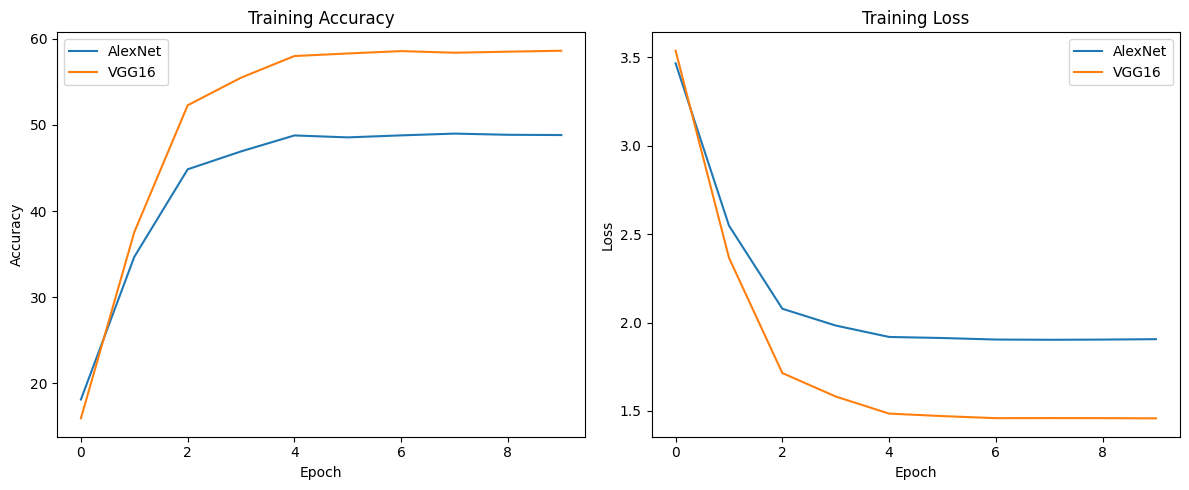

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
from torchvision.models import alexnet, vgg16
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR


def load_cifar100():
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                           download=True, transform=transform)
    testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                          download=True, transform=transform)

    trainloader = DataLoader(trainset, batch_size=256, shuffle=True, num_workers=4, pin_memory=True)
    testloader = DataLoader(testset, batch_size=256, shuffle=False, num_workers=4, pin_memory=True)

    return trainloader, testloader


def prepare_model(model_name, num_classes=100):
    if model_name == 'alexnet':
        model = alexnet(pretrained=True)

        model.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        model.classifier[6] = nn.Linear(4096, num_classes)
    elif model_name == 'vgg16':
        model = vgg16(pretrained=True)

        model.features[0] = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        model.classifier[6] = nn.Linear(4096, num_classes)
    else:
        raise ValueError("Model not supported")

    return model.to(device)


def train_model(model, trainloader, criterion, optimizer, scheduler, epochs=10):
    model.train()
    train_loss, train_acc = [], []

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        start_time = time.time()

        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        scheduler.step()
        epoch_time = time.time() - start_time
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        print(f'Epoch {epoch + 1}/{epochs} - Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.2f}%, Time: {epoch_time:.2f}s')

    return train_loss, train_acc


def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    start_time = time.time()

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    inference_time = time.time() - start_time
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    print(f'Inference Time: {inference_time:.2f} seconds')
    return accuracy, inference_time


def main():
    global device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")


    trainloader, testloader = load_cifar100()


    models = {
        'AlexNet': prepare_model('alexnet'),
        'VGG16': prepare_model('vgg16')
    }


    criterion = nn.CrossEntropyLoss()
    results = {}
    epochs = 10

    for name, model in models.items():
        print(f"\n===== Training {name} =====")
        optimizer = optim.Adam(model.parameters(), lr=0.0001)
        scheduler = StepLR(optimizer, step_size=2, gamma=0.1)


        train_loss, train_acc = train_model(model, trainloader, criterion, optimizer, scheduler, epochs)


        test_acc, inference_time = evaluate_model(model, testloader)


        results[name] = {
            'train_loss': train_loss,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'inference_time': inference_time
        }


    print("\n===== Final Comparison =====")
    for name, result in results.items():
        print(f"{name}:")
        print(f"  Test Accuracy: {result['test_acc']:.2f}%")
        print(f"  Inference Time: {result['inference_time']:.2f}s")
        print(f"  Final Training Accuracy: {result['train_acc'][-1]:.2f}%")


    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    for name, result in results.items():
        plt.plot(result['train_acc'], label=name)
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    for name, result in results.items():
        plt.plot(result['train_loss'], label=name)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:

!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.7 MB/s eta 0:00:00
